This machine learning project focused on **"Human Stress Detection."** In this project, we aim to leverage a dataset containing various physiological measurements to predict the stress levels experienced by individuals. Stress is a critical factor in overall well-being, and understanding its patterns  can provide valuable insights into improving sleep quality and managing stress-related health issues.

# Dataset

The dataset used in this project includes a range of physiological features such as snoring rate, respiration rate, body temperature, limb movement, blood oxygen levels, eye movement, sleeping hours, and heart rate, alongside stress levels as the target variable. The data has been preprocessed and prepared for machine learning analysis.

# Methodology

We have followed a structured approach to building and evaluating our stress detection model:

**Data Preprocessing**: The dataset has undergone preprocessing steps to handle missing values, normalize features, and prepare it for model training.

**Feature Selection**: We have explored the relationship between the features and the target variable using techniques such as Mutual Information and Correlation analysis to select the most relevant features for our model.

**Model Selection**: We have considered a variety of machine learning algorithms, including Decision Trees, Logistic Regression, Gaussian Naive Bayes, Support Vector Machines, Random Forests, k-Nearest Neighbors, Stochastic Gradient Descent, and Gradient Boosting, to find the most suitable model for stress level prediction.

**Model Evaluation**: The models' performances have been evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Cross-validation has also been applied to ensure robustness.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
data = pd.read_csv('human_stress_detection_dataset.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


# Data Preprocessing

1.Check for missing values.\
2.Explore data types and statistics of the features.\
3.Rename columns for clarity.\
4.Provide a summary of the dataset's statistics.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [4]:
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)

In [5]:
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [6]:
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [7]:
data.isnull().sum()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

In [8]:
data.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Class Distribution

Let's start by examining the distribution of stress levels in our dataset to understand whether it's balanced or imbalanced:

In [9]:
data['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

# Data Visualization

 We will use the Seaborn library to visualize the stress level distribution and explore relationships between features and stress levels:

<Axes: xlabel='stress level', ylabel='count'>

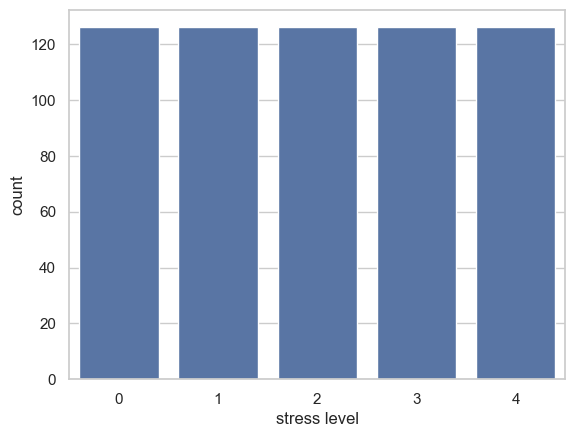

In [10]:
sns.set(style="whitegrid")
sns.countplot(x='stress level', data=data)

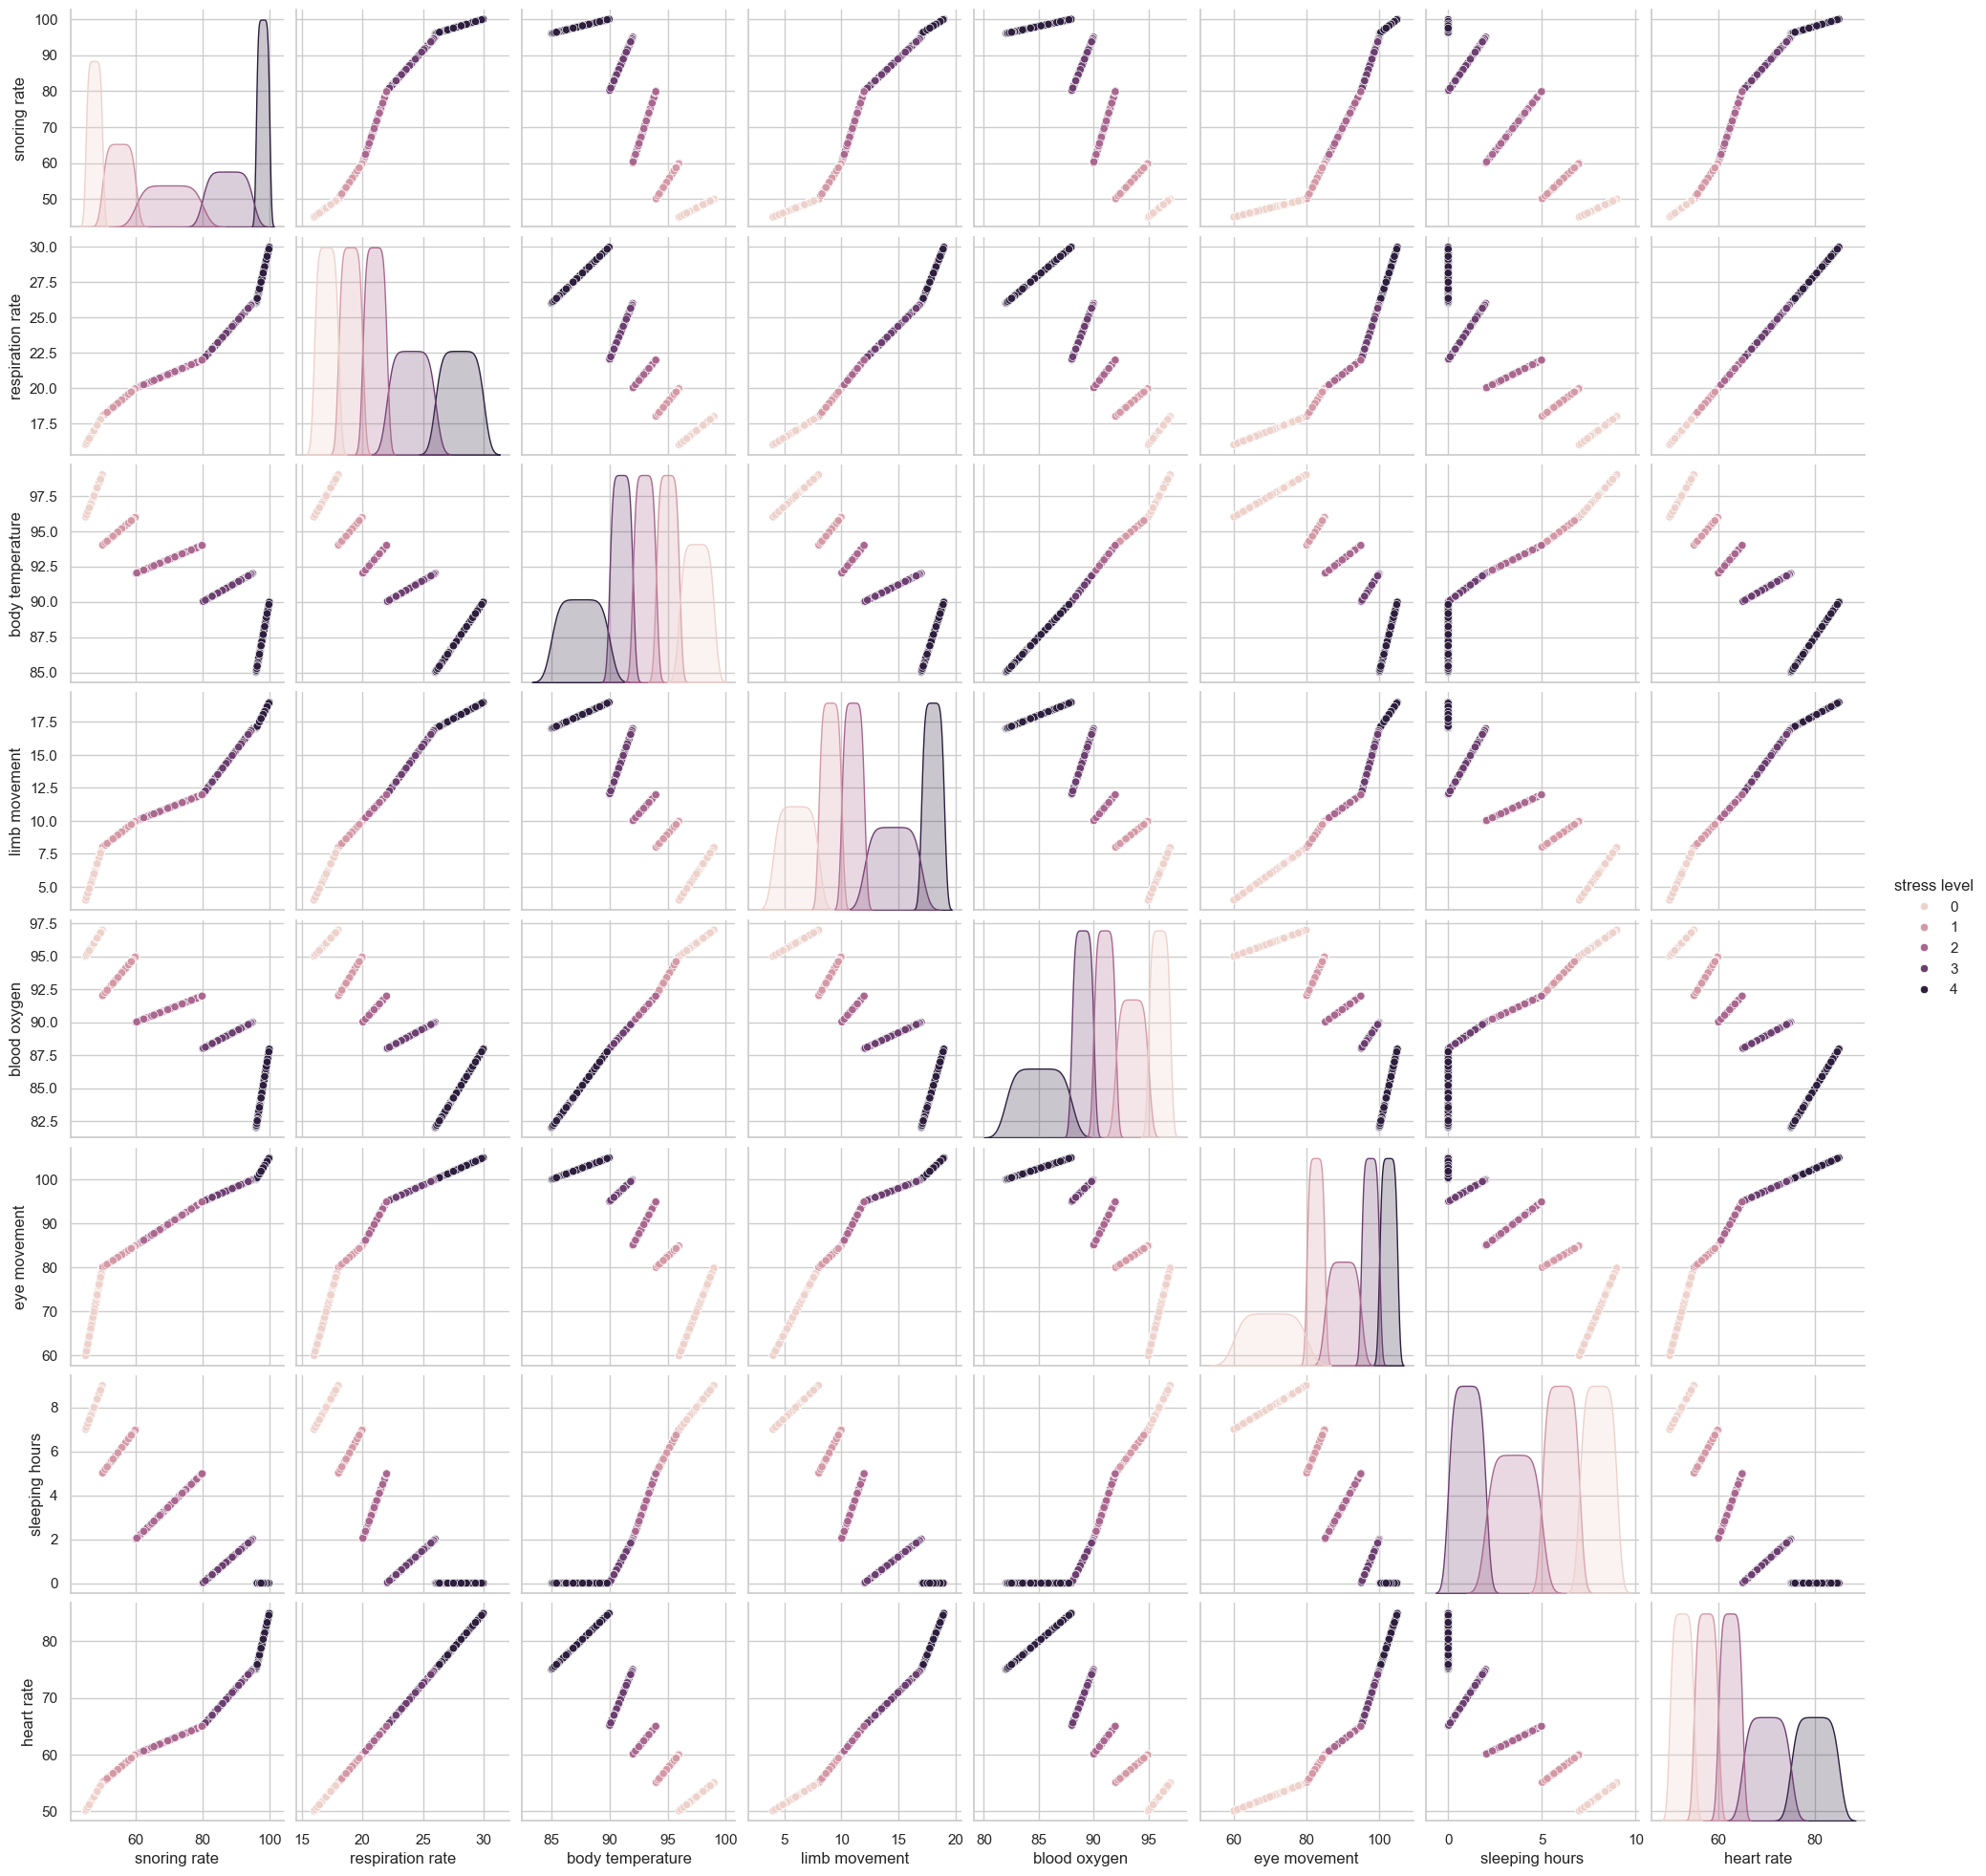

In [11]:
sns.pairplot(data, hue='stress level');

# Feature Scaling

In [12]:
from mlxtend.preprocessing import minmax_scaling

X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])

X_scaled = minmax_scaling(X, columns=X.columns)

# Feature Selection

In [13]:
from sklearn.feature_selection import mutual_info_regression

In [14]:
mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)

In [15]:
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])

In [16]:
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),
                      columns=['Spearman_Correlation'])

In [17]:
relation = mi.join(corr)

In [18]:
relation = relation.join(s_corr)

In [19]:
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
sleeping hours,1.603383,-0.973036,-0.983435
snoring rate,1.597828,0.975322,0.979788
respiration rate,1.594309,0.963516,0.979785
limb movement,1.594032,0.971071,0.979785
blood oxygen,1.593879,-0.961092,-0.979785
heart rate,1.593647,0.963516,0.979785
body temperature,1.593403,-0.962354,-0.979785
eye movement,1.591227,0.951988,0.979785


# Data Splitting

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify = y, shuffle=True)

In [22]:
# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model Selection

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
model=LogisticRegression()


In [26]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)


In [27]:
acc_model

100.0

# Cross-Validation

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [29]:
scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
cv_mean_scores=(scores.mean()*100)

In [30]:
cv_mean_scores

100.0

# Precision, Recall, and F1-Score

Precision, recall, and F1-score are important metrics for evaluating the model's performance, especially in multi-class classification tasks. They provide insights into how well the model performs for each class and its overall classification accuracy.

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
y_pred = model.predict(X_valid)

In [33]:
print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted')))

Precision score is: 1.000000 
Recall score is: 1.000000 
f1 score is: 1.000000


In [34]:
from sklearn.metrics import classification_report

In [35]:
report_svc = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
report_svc

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,25.0,25.0,25.0,26.0,25.0,1.0,126.0,126.0


# Classification Report

A classification report provides a more comprehensive overview of the model's performance, including precision, recall, and F1-score for each individual class. It also includes support, which indicates the number of occurrences of each class in the validation dataset.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_valid, y_pred)

In [38]:
cm_dataframe = pd.DataFrame(cm, columns=model.classes_, index=model.classes_)

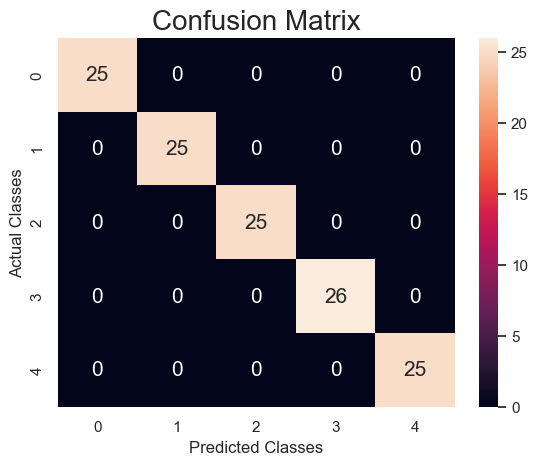

In [39]:
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

In [40]:
import joblib

In [41]:
joblib.dump(model, 'human_stress_detection.pkl')

['human_stress_detection.pkl']

In [42]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']